In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
font = cv2.FONT_HERSHEY_SIMPLEX

# Open CV

In [2]:
cascPath= "/home/vivek/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_frontalface_default.xml"
eyePath= "/home/vivek/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_eye.xml"
smilePath= "/home/vivek/anaconda3/lib/python3.7/site-packages/cv2/data/haarcascade_smile.xml"

faceCascade = cv2.CascadeClassifier(cascPath)
eyeCascade = cv2.CascadeClassifier(eyePath)
smileCascade = cv2.CascadeClassifier(smilePath)

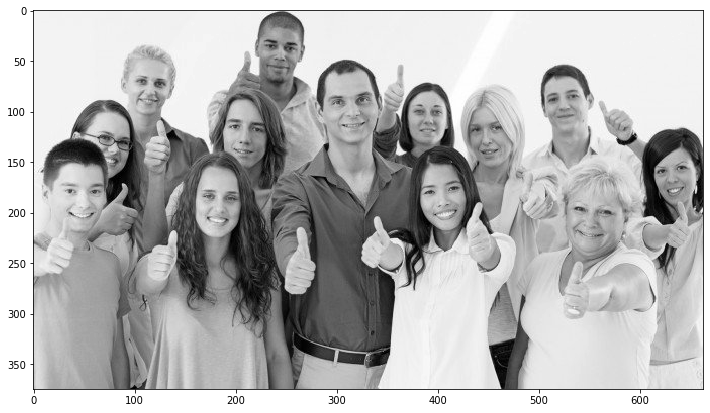

In [3]:
# Load the image
img = cv2.imread('data/test.jpg', 0)
plt.figure(figsize=(12,8))
plt.imshow(img, cmap='gray')
plt.show()

In [4]:
# Detect faces
faces = faceCascade.detectMultiScale(
img,
scaleFactor=1.1,
minNeighbors=5,
flags=cv2.CASCADE_SCALE_IMAGE
)
# For each face
for (x, y, w, h) in faces: 
    # Draw rectangle around the face
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 255, 255), 3)
    roi_gray = img[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    
    # Detect eyes
    eyes = eyeCascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
#     # Detect smile    
#     smile = smileCascade.detectMultiScale(
#         roi_gray,
#         scaleFactor= 1.16,
#         minNeighbors=35,
#         minSize=(25, 25),
#         flags=cv2.CASCADE_SCALE_IMAGE
#     )
#     # Draw a rectangle around smile
#     for (sx, sy, sw, sh) in smile:
#         cv2.rectangle(roi_color, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)
#         cv2.putText(frame,'Smile',(x + sx,y + sy), 1, 1, (0, 255, 0), 1)

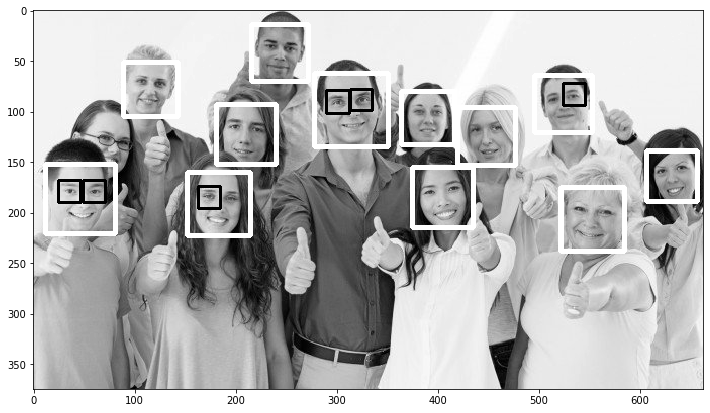

In [5]:
plt.figure(figsize=(12,8))
plt.imshow(img, cmap='gray')
plt.show()

## Live Dectection through webcam

In [6]:
video_capture = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect face
    faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(200, 200),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around the faces
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.putText(frame,'Face',(x, y), font, 2,(255,0,0),5)

    # Detect smile    
    smile = smileCascade.detectMultiScale(
        roi_gray,
        scaleFactor= 1.16,
        minNeighbors=35,
        minSize=(25, 25),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Draw a rectangle around smile
    for (sx, sy, sw, sh) in smile:
        cv2.rectangle(roi_color, (sh, sy), (sx+sw, sy+sh), (255, 0, 0), 2)
        cv2.putText(frame,'Smile',(x + sx,y + sy), 1, 1, (0, 255, 0), 1)
        
    # Detect eyes 
    eyes = eyeCascade.detectMultiScale(roi_gray)
    
    # Draw a reactangle around the eyes
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        cv2.putText(frame,'Eye',(x + ex,y + ey), 1, 1, (0, 255, 0), 1)

    cv2.putText(frame,'Number of Faces : ' + str(len(faces)),(40, 40), font, 1,(255,0,0),2)    
    
    # Display the resulting frame
    cv2.imshow('Video', frame)

    # Quit the frame 
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything is done, release the capture
video_capture.release()
cv2.destroyAllWindows()

# CNN in Dlib

In [7]:
# Load the model
dnnFaceDetector = dlib.cnn_face_detection_model_v1("model/mmod_human_face_detector.dat")

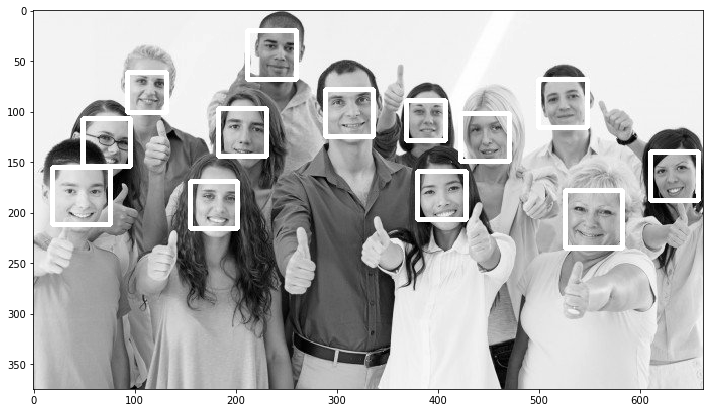

In [8]:
# Read the image
img = cv2.imread('data/test.jpg', 0)

rects = dnnFaceDetector(img, 1)
for (i, rect) in enumerate(rects):    
    x1 = rect.rect.left()
    y1 = rect.rect.top()
    x2 = rect.rect.right()
    y2 = rect.rect.bottom()    
    # Draw a rectangle around the face
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 255, 255), 3)
plt.figure(figsize=(12,8))
plt.imshow(img, cmap='gray')
plt.show()

## Live Dectection through webcam

In [9]:
# Video capture through webcam
video_capture = cv2.VideoCapture(0)
flag = 0

while True:
    # Capture frame-by-frame
    ret, frame = video_capture.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    rects = dnnFaceDetector(gray, 1)

    for (i, rect) in enumerate(rects):

        x1 = rect.rect.left()
        y1 = rect.rect.top()
        x2 = rect.rect.right()
        y2 = rect.rect.bottom()

        # Rectangle around the face
        cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Display the video output
    cv2.imshow('Video', frame)

    # Quit video by typing Q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

# DNN

In [10]:
# DNN model
prototxt_path = 'model/deploy.prototxt'
caffemodel_path ='model/weights.caffemodel'

# Load the model
model = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

In [11]:
# Read the image
img = cv2.imread('data/test.jpg')
(h, w) = img.shape[:2]

# Preapre the input
blob = cv2.dnn.blobFromImage(cv2.resize(img, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

model.setInput(blob)
detections = model.forward()

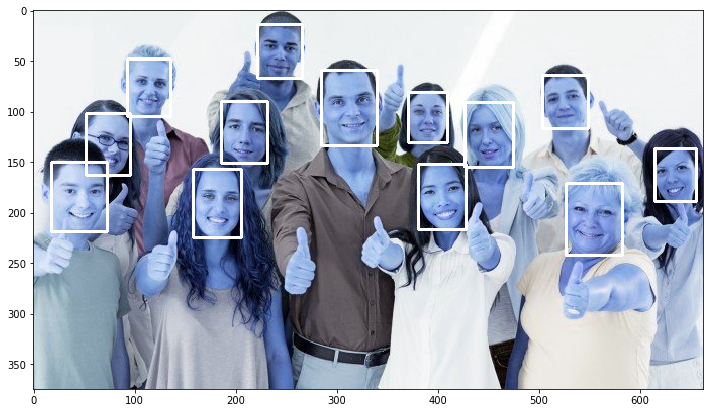

In [12]:
# Create frame around face
for i in range(0, detections.shape[2]):
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")

    confidence = detections[0, 0, i, 2]

    # If confidence > 0.5, show box around face
    if (confidence > 0.5):
        cv2.rectangle(img, (startX, startY), (endX, endY), (255, 255, 255), 2)
    
#     # Confidence level 
#     text = "{:.2f}%".format(confidence * 100)
#     y = startY - 10 if startY - 10 > 10 else startY + 10
#     cv2.putText(img, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)


plt.figure(figsize=(12,8))    
plt.imshow(img)
plt.show()

## Cropping the face from image

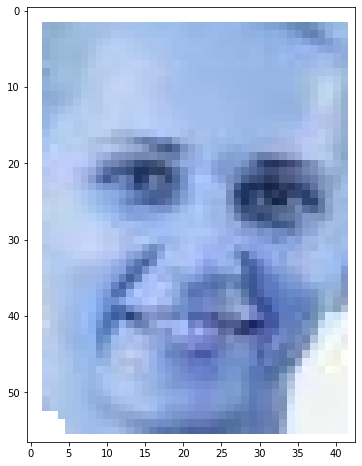

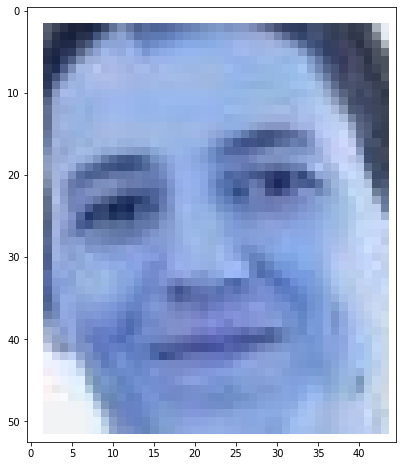

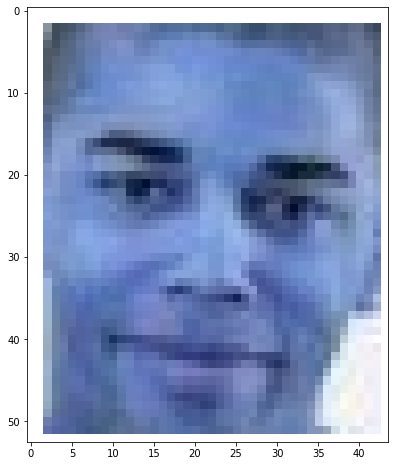

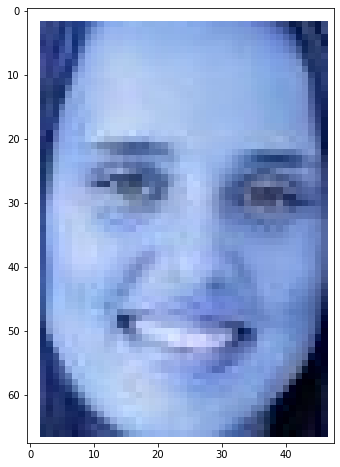

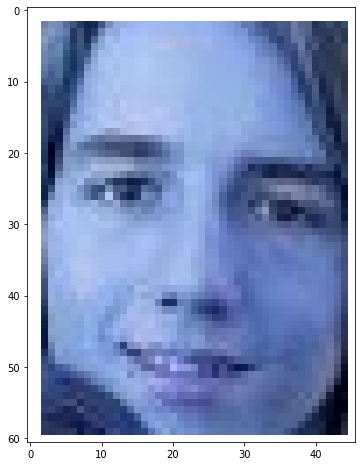

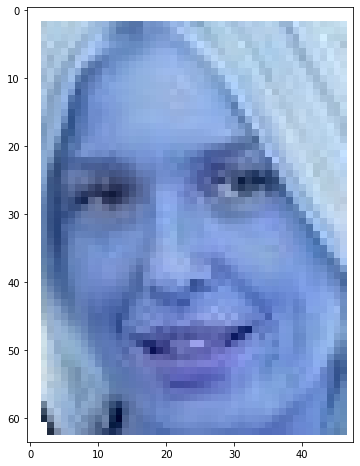

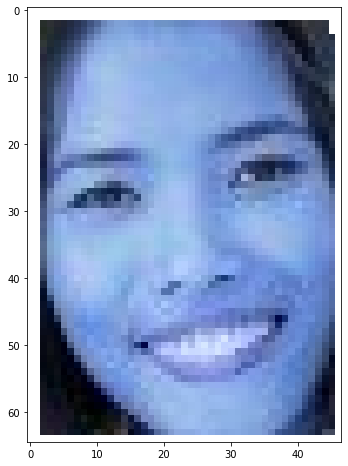

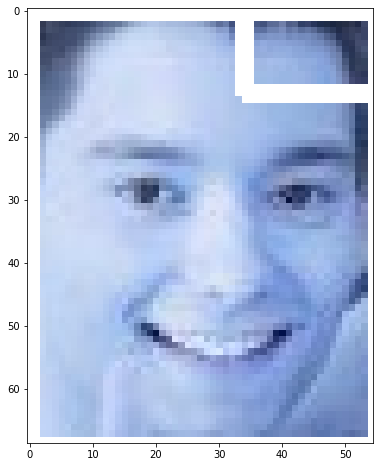

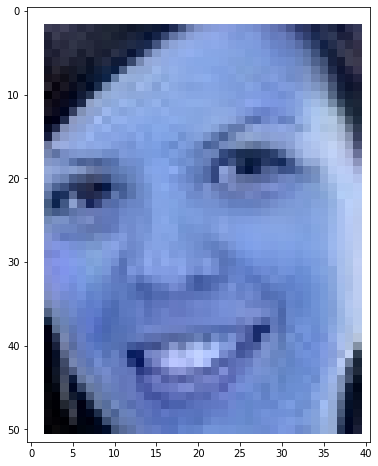

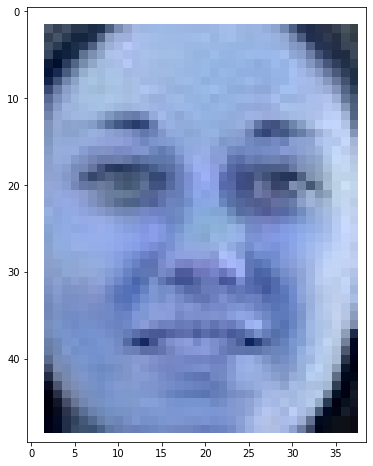

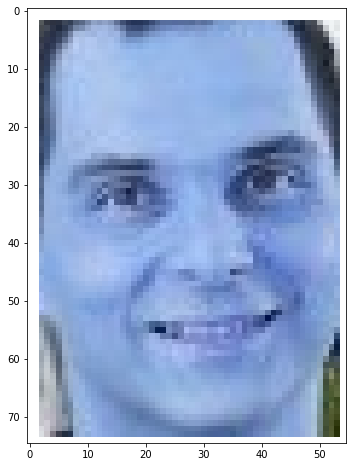

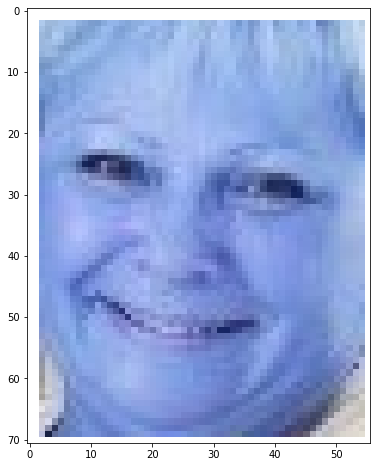

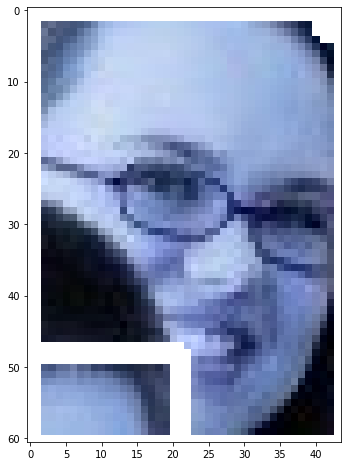

In [13]:
# Identify each face
count=0
for i in range(0, detections.shape[2]):
    
    box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")

    confidence = detections[0, 0, i, 2]

  # If confidence > 0.5, save it as a separate file
    if (confidence > 0.5):
        count += 1
        frame = img[startY:endY, startX:endX]
        plt.figure(figsize=(12,8))
        plt.imshow(frame)
        plt.show()